In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
dataType='val2017'
annFile='annotations/instances_{}.json'.format(dataType)

In [70]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.31s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food kitchen accessory appliance sports indoor outdoor electronic animal vehicle furniture person


In [64]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
def show_img(img):
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    plt.show()
    return I

In [12]:
# get all images containing given categories, select one at random
def get_img(labels):
    catIds = coco.getCatIds(catNms=labels);
    imgIds = coco.getImgIds(catIds=catIds );
    # imgIds = coco.getImgIds(imgIds = [324158])
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    return img

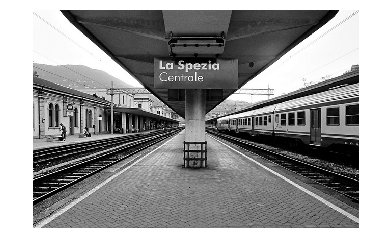

In [8]:
show_img(img)

In [100]:
## so we want to think three different images and get the captioning based on that..

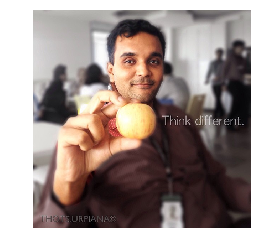

In [280]:
img1 = get_img(labels=['person'])
I1 = show_img(img1)

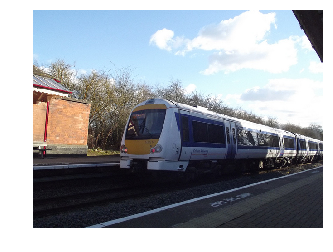

In [66]:
## img2 any random image train
img2 = get_img(labels=['train'])
I2 = show_img(img2)

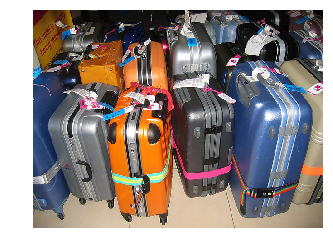

In [184]:
## any random image of suitcase
img3 = get_img(labels=['suitcase'])
I3 = show_img(img3)

In [75]:
# initialize COCO api for caption annotations
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.94s)
creating index...
index created!


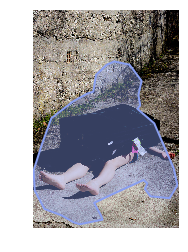

In [101]:
## get the captions for each of the images and run a topic modelling on the tokens extracted from each of the documents
plt.imshow(I3); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)


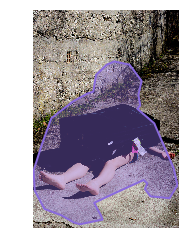

In [103]:
# load and display keypoints annotations
plt.imshow(I3); plt.axis('off')
ax = plt.gca()
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)


In [126]:
annFile = 'annotations/captions_{}.json'.format(dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


## Image1

A man holding an apple between his fingers.
  guy sitting down holding a peach between fingers
A man holding a ball in his hand in a room.
A man is holding fruit between his fingers.
a picture of a guy holding an apple


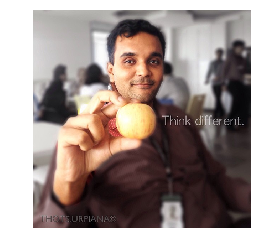

In [282]:
# load and display caption annotations
plt.imshow(I1); plt.axis('off');
annIds = coco_caps.getAnnIds(imgIds=img1['id']);
anns1 = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns1)


## Image 2

Fast commuter train moving past an outdoor platform.
A train on the track pulling by a train station.
A train pulling into a station outside during the day.
A passenger train moving through a rail yard
a long passenger train pulling up to a station


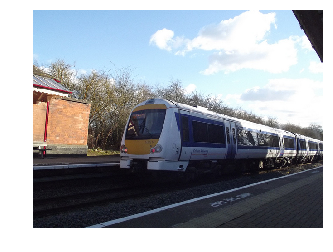

In [165]:
# load and display caption annotations
plt.imshow(I2); plt.axis('off');
annIds = coco_caps.getAnnIds(imgIds=img2['id']);
anns2 = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns2)


### Image3

Many pieces of luggage gathers together, all with tags attached.
Rows of various colored suitcases at an airport.
A pile of different colored bags of luggage sitting on a floor.
Three rows of luggage of various color and size.
Several suit cases lined in rows with luggage tags on them.


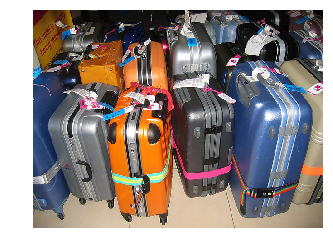

In [185]:
# load and display caption annotations
plt.imshow(I3); plt.axis('off');
annIds = coco_caps.getAnnIds(imgIds=img3['id']);
anns3 = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns3)


## tokenize the text and do topic modelling

## prepare text for lda

In [283]:
from spacy.lang.en import English
import spacy
spacy.load('en')
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
#         elif token.orth_.startswith('@'):
#             lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [268]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
stopword_set = set(nltk.corpus.stopwords.words('english'))
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [269]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 2]
    tokens = [token for token in tokens if token not in stopword_set]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

#### end of tokenize text

In [265]:
def get_tokens(anns):
    final_tokens = list()
    for text in anns:
        lda_tokens = prepare_text_for_lda(text['caption'])
        final_tokens.extend(lda_tokens)
    return final_tokens

In [284]:
# image1
tokens1 = get_tokens(anns1)
tokens2 = get_tokens(anns2)
tokens3 = get_tokens(anns3)

In [285]:
# treat each image as doc and combine all the captions from them
tokens = [tokens1] + [tokens2] + [tokens3]
# tokens = [tokens1 + tokens2 + tokens3]

In [286]:
## visualize in gensim
from gensim import corpora
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [287]:
# LDA for 3 topics
import gensim
import pyLDAvis.gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=8)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)

/Users/akshayuppal/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/akshayuppal/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/akshayuppal/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(

In [288]:
# visualize the topics
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)

/Users/akshayuppal/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [289]:
print(topics)
pyLDAvis.display(lda_display)


[(0, '0.166*"train" + 0.086*"station" + 0.086*"pulling" + 0.059*"move"'), (1, '0.020*"holding" + 0.020*"finger" + 0.020*"train" + 0.020*"sitting"'), (2, '0.100*"luggage" + 0.076*"row" + 0.052*"colored" + 0.052*"various"'), (3, '0.161*"holding" + 0.099*"finger" + 0.099*"man" + 0.068*"apple"'), (4, '0.020*"holding" + 0.020*"train" + 0.020*"finger" + 0.020*"luggage"')]
